In [1]:
import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from functools import partial

In [2]:
def read_all_results(dir_path):
    paths = os.listdir(dir_path)
    last_gens = []
    for i in range(len(paths)):
        path = dir_path + paths[i]
        try:
            last_gen = sorted(map(lambda x: x.split("_"), 
                            os.listdir(f"{path}/individuals/")), 
                            key=lambda x: int(x[1].split(".")[0]))[-1][-1][:-4]
            print(f"{i+1}: Path: {paths[i]}, last generation: {int(last_gen)}")
            last_gens.append(int(last_gen))
        except:
            continue
    return paths, last_gens

In [5]:
dir_path = "results/"
paths, last_gens = read_all_results(dir_path)

1: Path: GA_2021_06_02_13_37_12, last generation: 43
2: Path: GA_2021_06_02_13_37_24, last generation: 39
3: Path: GA_2021_06_02_13_34_16, last generation: 32
4: Path: GA_2021_06_02_13_36_45, last generation: 34
5: Path: GA_2021_06_02_13_33_28, last generation: 32
6: Path: GA_2021_06_02_13_34_00, last generation: 31
7: Path: GA_2021_06_02_18_57_31, last generation: 9
8: Path: GA_2021_06_02_13_32_50, last generation: 35
9: Path: GA_2021_06_02_13_36_32, last generation: 30


In [25]:
run = 2
path = dir_path + paths[run-1]
with open(path + "/run_params.json", "r") as file:
    print(file.read())
    file.close()

{
    "objective": "yll",
    "simulations": 15,
    "process": {
        "horizon": 74,
        "decision_period": 28,
        "policy": "weighted"
    },
    "population_size": 50,
    "random_individuals": true,
    "min_generations": 100
}


## Individual results

In [26]:
gen = 39
individuals_path =  f"{path}/individuals/individuals_{gen}.pkl"
individuals = utils.read_pickle(individuals_path)

In [27]:
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
print("Strategy_count:")
print(f"{utils.tcolors.BOLD}{'#':<3} {'U':<5}{'D':<5}{'N':<5}{utils.tcolors.ENDC}")
for trend_count in range(6):
    strategy_count = individuals[0].strategy_count
    print(f"{trend_count+1:<2}| {strategy_count['U'][trend_count]:<5}{strategy_count['D'][trend_count]:<5}{strategy_count['N'][trend_count]:<5}")
print()
for ix, i in enumerate(sorted(individuals, key=lambda x: x.mean_score)):
    print(f"{utils.tcolors.BOLD}{ordinal(ix+1)} place:{utils.tcolors.ENDC}")
    print(f"ID: {i.ID}")
    print(f"Score: {np.round(i.mean_score, 3)}")
    print(f"Genes:\n{np.round(i.genes, 3)}")
    print()

Strategy_count:
#   U    D    N    
1 | 35   35   36   
2 | 27   32   36   
3 | 12   17   33   
4 | 1    6    28   
5 | 0    0    16   
6 | 0    0    2    

1st place:
ID: gen_13_008
Score: 15699.727
Genes:
[[[0.15  0.126 0.333 0.073 0.319]
  [0.056 0.202 0.493 0.089 0.16 ]
  [0.332 0.142 0.132 0.324 0.07 ]]

 [[0.016 0.125 0.554 0.229 0.076]
  [0.176 0.162 0.306 0.261 0.095]
  [0.236 0.134 0.152 0.165 0.313]]

 [[0.201 0.293 0.091 0.349 0.066]
  [0.084 0.247 0.433 0.074 0.162]
  [0.252 0.249 0.271 0.212 0.017]]]

2nd place:
ID: gen_38_011
Score: 16889.667
Genes:
[[[0.196 0.164 0.435 0.095 0.11 ]
  [0.056 0.202 0.493 0.089 0.16 ]
  [0.328 0.144 0.144 0.304 0.081]]

 [[0.016 0.125 0.554 0.229 0.076]
  [0.176 0.162 0.306 0.261 0.095]
  [0.175 0.169 0.194 0.22  0.243]]

 [[0.201 0.293 0.091 0.349 0.066]
  [0.258 0.2   0.351 0.06  0.131]
  [0.252 0.254 0.272 0.202 0.02 ]]]

3rd place:
ID: gen_28_004
Score: 16941.333
Genes:
[[[0.134 0.187 0.324 0.068 0.287]
  [0.043 0.197 0.502 0.101 0.157]

In [28]:
genes = np.sum(individuals[0].genes, axis=(0,1))
norm = np.sum(genes)
norm_genes = np.divide(genes, norm)
print(norm_genes)

[0.15403717 0.18532962 0.30440643 0.19966114 0.15656564]


## Generation Means

In [57]:
generation_scores = os.listdir(path+"/final_scores/")
final_scores = []
for score in sorted(generation_scores, key=lambda x: int(x.split("_")[2][:-4])):
    final_scores.append(utils.read_pickle(path+"/final_scores/"+score))

generation_means = defaultdict(list)
for gen_scores in final_scores:
    gen_individual_means = defaultdict(list)
    for individual in gen_scores.keys():
        for objective, scores in gen_scores[individual].items():
            gen_individual_means[objective].append(np.mean(scores))
    for objective, scores in gen_individual_means.items():
        generation_means[objective].append(np.mean(scores))
generation_means = dict(generation_means)
result_means = pd.DataFrame(generation_means)
result_means.index.rename("generation", inplace=True)
result_means

,deaths,infected,weighted,yll
generation,,,,
0,1334.770310,135374.777365,2688.518084,18014.645333
1,1333.872896,135253.575108,2686.408647,17998.576471
2,1333.170709,135145.881387,2684.629523,17985.320513
3,1331.521945,134969.858082,2681.220526,17959.811321
4,1330.582442,134839.845170,2678.980894,17944.859259
5,1329.510337,134729.163052,2676.801968,17928.638788
6,1328.490430,134637.699823,2674.867428,17914.495238
7,1327.335370,134519.721324,2672.532584,17897.623392
8,1326.082147,134370.762219,2669.789769,17877.900000


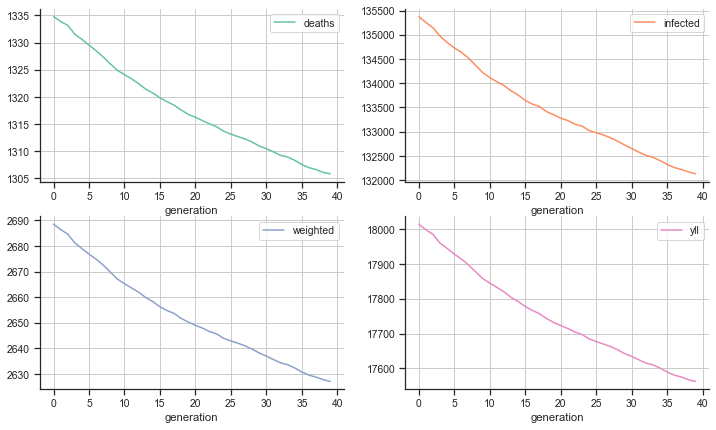

In [61]:
sns.set(font_scale=.95)
sns.set_style('ticks')
colors = sns.color_palette('Set2')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7))
for i, col in enumerate(result_means.columns):
    ax = axs[i//2][i%2]
    result_means[col].plot(label=col, color=colors[i], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.grid()
plt.show()

## Best individual

In [46]:
filenames = os.listdir(path+"/best_individuals/")
best_individuals = []
for individual in sorted(filenames, key=lambda x: int(x.split("_")[2][:-4])):
    best_individuals.append(utils.read_pickle(path+"/best_individuals/"+individual))

best_individual_scores = {gen: {"individual": None,"deaths":None, "infected":None, "weighted":None, "yll":None} for gen in range(len(best_individuals))}
for i, individual in enumerate(best_individuals):
    best_individual_scores[i]["individual"] = individual
    for obj in ["deaths", "infected", "weighted", "yll"]:
        best_individual_scores[i][obj] = np.mean(final_scores[i][individual.ID][obj])
results = pd.DataFrame(dict(best_individual_scores)).T
results.index.rename("generation", inplace=True)
results

,individual,deaths,infected,weighted,yll
generation,,,,,
0,gen_0_021,1297.185748,128918.115888,2586.366907,17257.133333
1,gen_0_021,1297.185748,128918.115888,2586.366907,17257.133333
2,gen_2_011,1297.359196,129653.501621,2593.894212,17309.266667
3,gen_3_006,1245.786219,125816.646248,2503.952682,16633.333333
4,gen_3_006,1245.786219,125816.646248,2503.952682,16633.333333
5,gen_3_006,1245.786219,125816.646248,2503.952682,16633.333333
6,gen_3_006,1245.786219,125816.646248,2503.952682,16633.333333
7,gen_3_006,1245.786219,125816.646248,2503.952682,16633.333333
8,gen_3_006,1245.786219,125816.646248,2503.952682,16633.333333


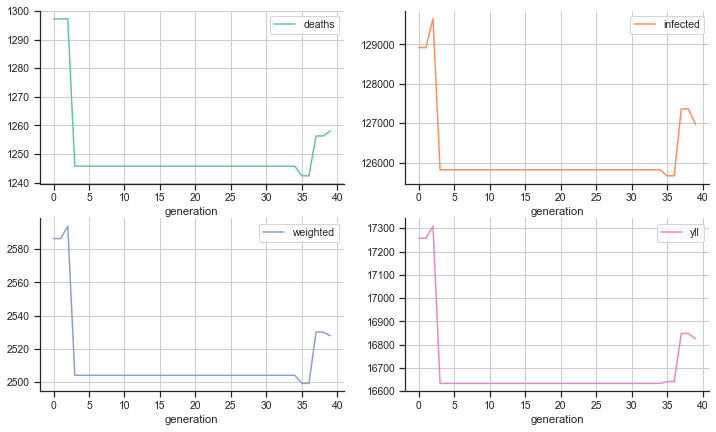

In [62]:
sns.set(font_scale=.95)
sns.set_style('ticks')
colors = sns.color_palette('Set2')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7))
for i, col in enumerate(results.columns[1:]):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.grid()
plt.show()